# TechLab - Trading Algoritmico Pt.3

Import delle librerie necessarie

In [1]:
%matplotlib widget
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np

In [2]:
style.use('ggplot')

Eseguire il seguente codice per ottenere i dati on-line:

In [3]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/TSLA.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [4]:
dta = pd.read_csv('Data/TSLA.csv', parse_dates=True)
dta['Date'] = pd.to_datetime(dta['Date'])
dta = dta.drop(['Open','High','Low','Close','Volume'], axis=1)
dta = dta.set_index('Date')
y = pd.Series(dta['Adj Close'], index=dta.index)
giorni = 300
forecast = 30
y = y[(len(y)-giorni-forecast):(len(y)-forecast)]

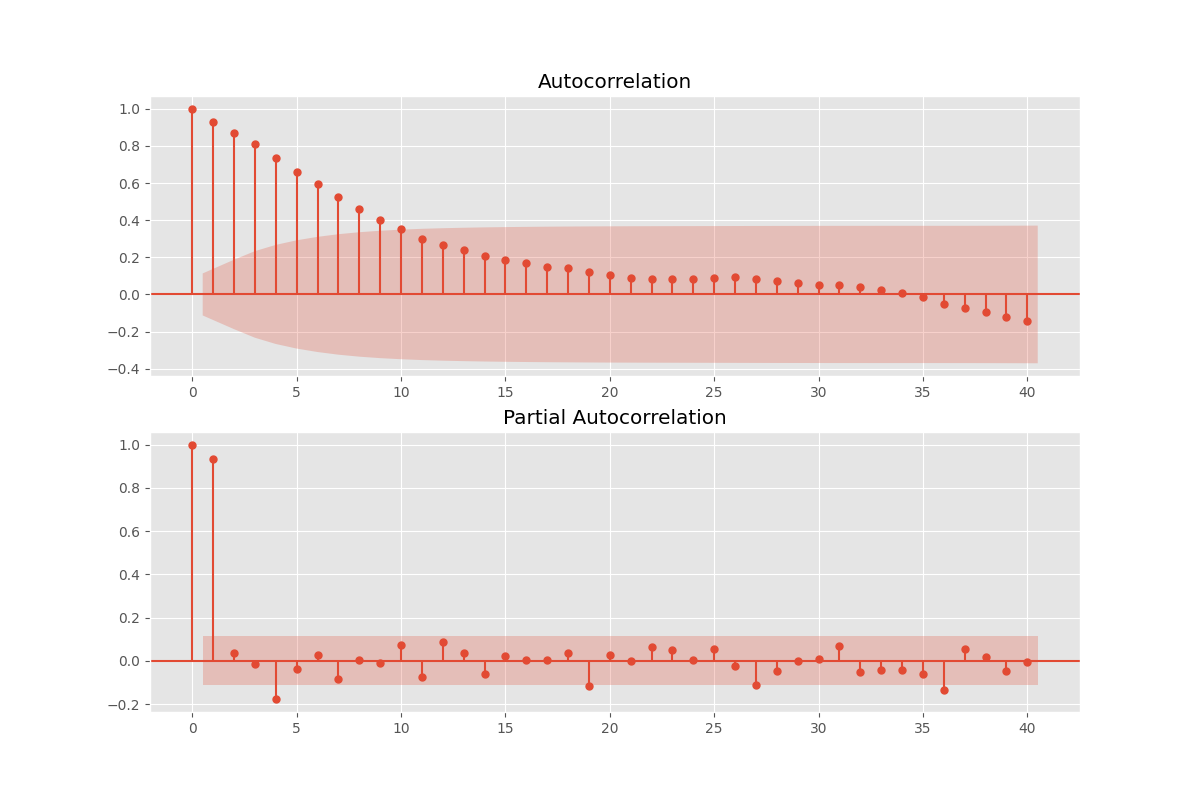

In [5]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [6]:
arma_mod = sm.tsa.ARIMA(y, order=(2,0,9), missing='drop')
arma_res = arma_mod.fit()
print(arma_res.summary())
y.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71200D+00    |proj g|=  1.26071D-02


 This problem is unconstrained.



At iterate    5    f=  3.71143D+00    |proj g|=  4.73976D-04

At iterate   10    f=  3.71141D+00    |proj g|=  5.46363D-04

At iterate   15    f=  3.71114D+00    |proj g|=  5.70646D-03

At iterate   20    f=  3.71098D+00    |proj g|=  8.27782D-05

At iterate   25    f=  3.71097D+00    |proj g|=  6.95843D-04

At iterate   30    f=  3.71089D+00    |proj g|=  1.34630D-03

At iterate   35    f=  3.71086D+00    |proj g|=  3.97904D-05

At iterate   40    f=  3.71086D+00    |proj g|=  1.28786D-06

At iterate   45    f=  3.71086D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     46     52   

Date
2017-09-08    343.399994
2017-09-11    363.690002
2017-09-12    362.750000
2017-09-13    366.230011
2017-09-14    377.640015
Name: Adj Close, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


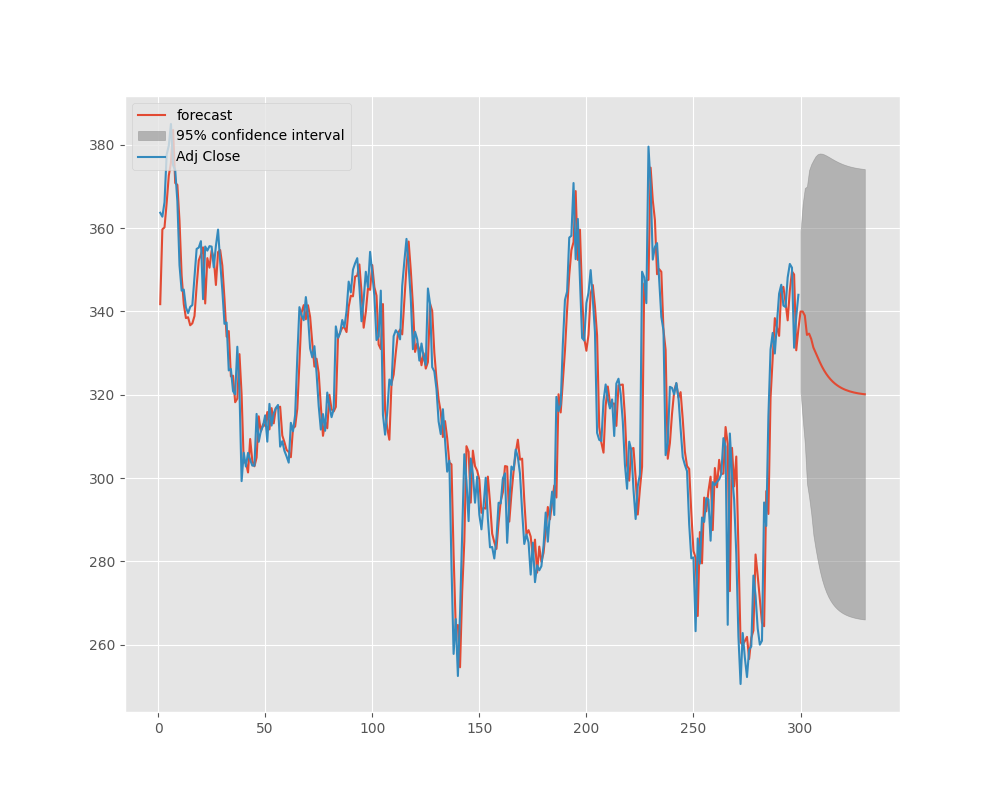

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=1, end=giorni+forecast, ax=ax)
legend = ax.legend(loc='upper left')

<AxesSubplot:xlabel='Date'>

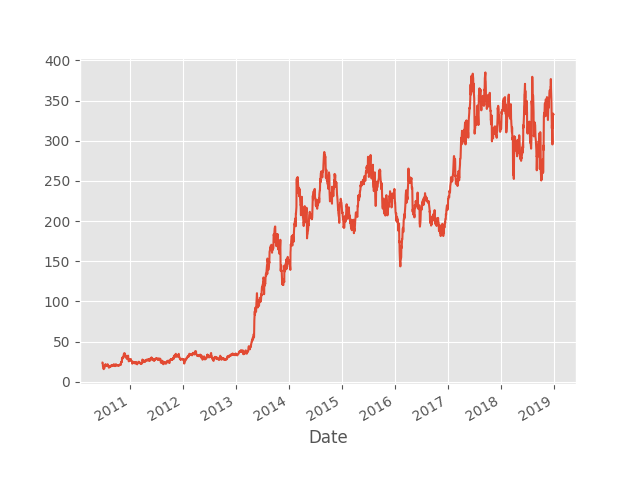

In [8]:
plt.figure();
dta['Adj Close'].plot()

Eseguire il seguente codice per ottenere i dati on-line:

In [9]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2018,12,31)
#df = web.DataReader('ISP.MI', 'yahoo', start, end)
#print(df.head())
#df.to_csv('Data/ISP.csv')

Eseguire il seguente codice per ottenere i dati off-line:

In [10]:
dta = pd.read_csv('Data/ISP.csv', parse_dates=True)
dta['Date'] = pd.to_datetime(dta['Date'])
dta = dta.drop(['Open','High','Low','Close','Volume'], axis=1)
dta = dta.set_index('Date')
y = pd.Series(dta['Adj Close'], index=dta.index)
giorni = 300
forecast = 30
y = y[(len(y)-giorni-forecast-870):(len(y)-forecast-870)]

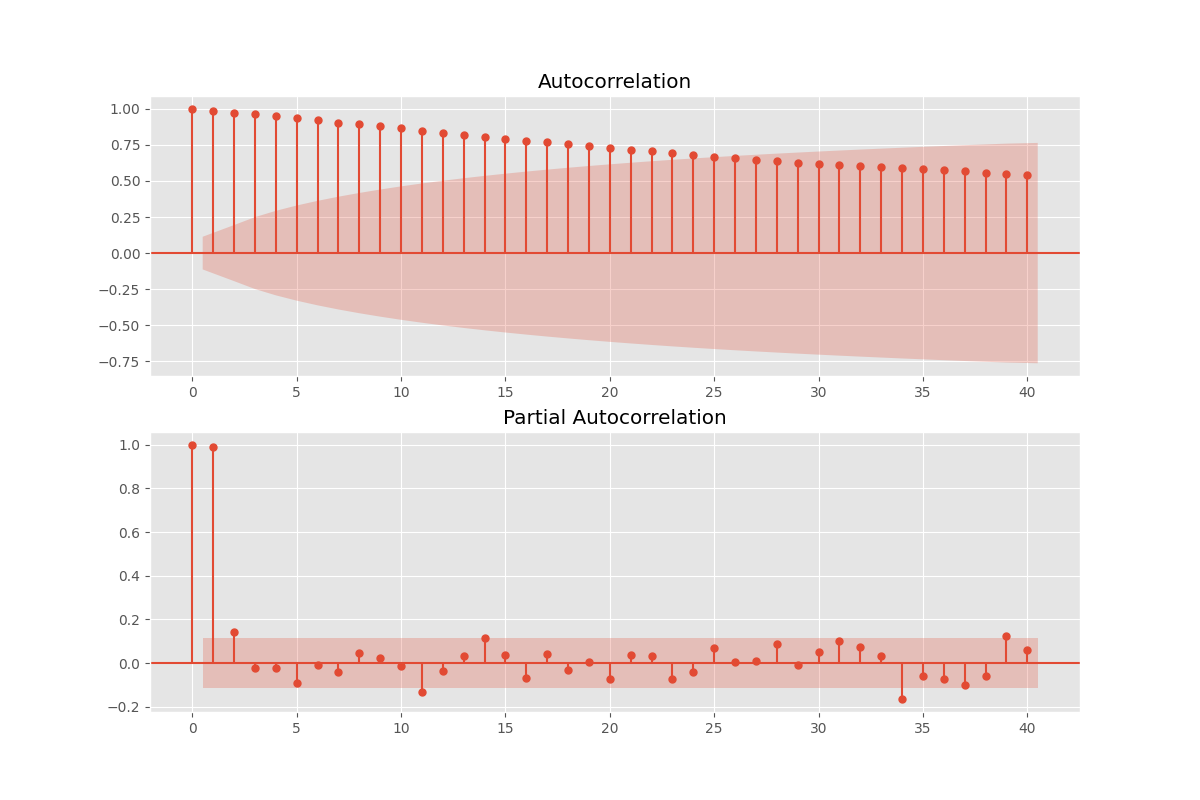

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [12]:
arma_mod = sm.tsa.ARIMA(y, order=(3,0,10), missing='drop')
arma_res = arma_mod.fit()
print(arma_res.summary())
y.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83045D+00    |proj g|=  1.49399D-02


 This problem is unconstrained.



At iterate    5    f= -1.83500D+00    |proj g|=  4.24130D-03

At iterate   10    f= -1.83692D+00    |proj g|=  6.59990D-03

At iterate   15    f= -1.83747D+00    |proj g|=  5.00084D-03

At iterate   20    f= -1.83917D+00    |proj g|=  1.69114D-03

At iterate   25    f= -1.83921D+00    |proj g|=  2.81641D-04

At iterate   30    f= -1.83922D+00    |proj g|=  1.43330D-04

At iterate   35    f= -1.83922D+00    |proj g|=  6.83897D-06

At iterate   40    f= -1.83922D+00    |proj g|=  2.88658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     43     62      1     0     0   3.486D-06  -1.839D+00
  F =  -1.83921657595

Date
2014-04-09    1.780665
2014-04-10    1.753534
2014-04-11    1.707839
2014-04-14    1.710695
2014-04-15    1.642153
Name: Adj Close, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


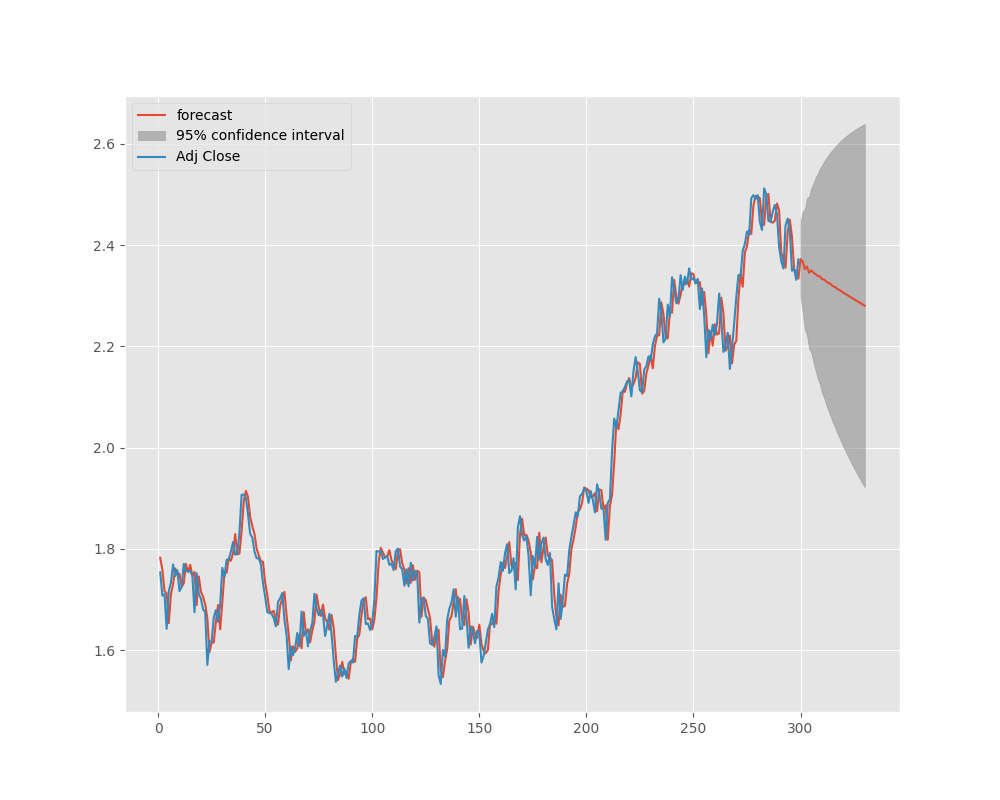

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=1, end=giorni+forecast, ax=ax)
legend = ax.legend(loc='upper left')

<AxesSubplot:xlabel='Date'>

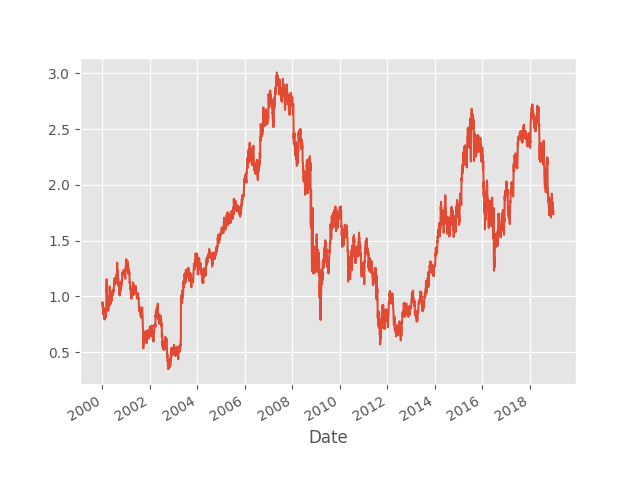

In [14]:
plt.figure();
dta['Adj Close'].plot()